# Prédiction de survie au désastre du Titanic


Le Titanic était une catastrophe en soi.

Nous disposons d'un ensemble de données qui contient divers attributs des passagers à bord, tels que l'âge, le sexe, etc.  
Nous utiliserons un modèle approprié pour prédire la probabilité de survie des passagers en fonction de ces divers attributs.  

## Sections:  
1. <a href=#Traitement_des_donnees>Traitement des données</a>
2. <a href=#Exploration_des_donnees>Exploration des données</a>

## Traitement des données

Les variables contenues dans le dataset sont:
  
- `survival`  Survie (0 = No; 1 = Yes)
- `pclass`  Classe du passager (1 = 1st; 2 = 2nd; 3 = 3rd)
- `name`  Nom
- `sex`  Sexe
- `age`  Âge
- `sibsp` Nombre de frères et soeurs/conjoints à bord
- `parch`  Nombre de parents/enfants à bord
- `ticket`  Numéro du ticket
- `fare`  Tarif
- `cabin`  Cabine
- `embarked`  Port d'embarcation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
#Import des librairies nécessaires dans une seule cellule
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
import sklearn.ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
data = pd.read_csv("..\\Datasets\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Etude des modalités des différentes variables

Création d'une boucle plus pertinente

In [5]:
for col in data.columns:
    print (f"La colonne {col} a {data[col].nunique()} modalités")
    
# On vire les colonnes qui n'ont qu'une modalité (pouvoir prédictif inexistant)
for col in data.columns:
    if len(data[col].unique()) == 1:
        data.drop(col,inplace=True,axis=1)

La colonne PassengerId a 891 modalités
La colonne Survived a 2 modalités
La colonne Pclass a 3 modalités
La colonne Name a 891 modalités
La colonne Sex a 2 modalités
La colonne Age a 88 modalités
La colonne SibSp a 7 modalités
La colonne Parch a 7 modalités
La colonne Ticket a 681 modalités
La colonne Fare a 248 modalités
La colonne Cabin a 147 modalités
La colonne Embarked a 3 modalités


Visualisation des valeurs manquantes

In [6]:
((data.isnull().sum())/len(data)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Variable Age

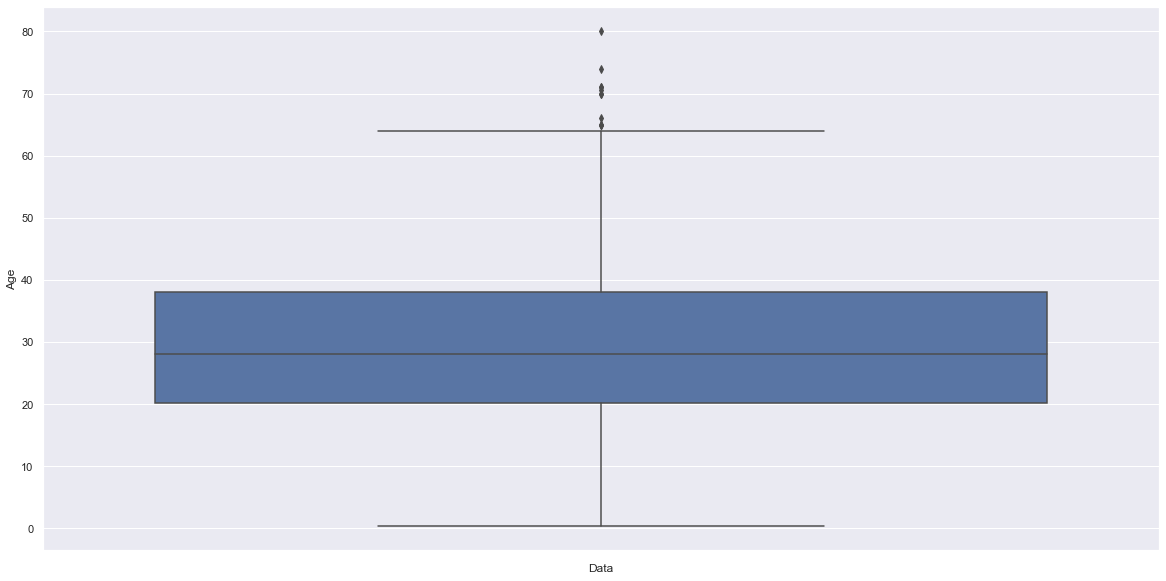

In [7]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid", palette="muted")
sns.set(rc={'figure.figsize':(20.0,5.0)})
sns.set(color_codes=True)
ax = sns.boxplot(y=data['Age'])
plt.ylabel('Age')
plt.xlabel('Data')
plt.show()

Dans un premier temps, on remarque la présence de valeurs manquantes pour la variable Age.

De même, il y a des valeurs inférieures à 1 pour l'âge. Il est indiqué dans le jeu de données que l'âge est fractionnaire s'il est inférieur à 1. Si l'âge est estimé, c'est sous la forme xx.5.

##### Correction du code ci-dessous qui affichait toutes les variables au lieu d'Age uniquement

In [8]:
data[data['Age'] < 1.0]['Age'].count()

7

In [9]:
data[data['Age'].isnull()]['Age'].count()

0

##### Correction de l'âge en remplaçant les nan et les valeurs inférieures à 1 par la médiane.

In [10]:
data[data['Age'] < 1.0]['Age'] = np.NaN
data['Age']= data['Age'].fillna((data['Age'].median()))
data.describe()

C:\Users\Mathi\AppData\Local\Temp/ipykernel_7352/1067575239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['Age'] < 1.0]['Age'] = np.NaN


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Correction du problème mentionné ci-dessous

*PROBLEM* One problem I see is that all other columns now have reduced entries in comparison to Age column.  
Let's see other attributes too.  


##### Drop des observations manquantes et simplification du code

In [11]:
data[data.isnull().T.any().T]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


Il y a 77.1% de valeurs manquantes pour la variable Cabin, on décide donc de la drop.

In [12]:
data.drop('Cabin', axis=1, inplace=True)

In [13]:
data[data.isnull().T.any().T]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


### Variable Embarked

In [14]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
##U for Unknown
data['Embarked']= data['Embarked'].fillna('U')

In [16]:
(data['Embarked'].unique())

array(['S', 'C', 'Q', 'U'], dtype=object)

In [17]:
data.drop(columns=['Name','Ticket'], inplace=True) #drop de Cabin inutile
data = pd.get_dummies(data)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0


##### On vérifie qu'il n'y a plus de valeurs manquantes

In [19]:
((data.isnull().sum())/len(data)*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Sex_female     0.0
Sex_male       0.0
Embarked_C     0.0
Embarked_Q     0.0
Embarked_S     0.0
Embarked_U     0.0
dtype: float64

## Exploration des relations entre les variables

In [20]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
PassengerId,1.000000e+00,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148,-6.756184e-19
Survived,-5.006661e-03,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660,6.009485e-02
Pclass,-3.514399e-02,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720,-7.428233e-02
Age,3.421211e-02,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.081163,0.030248,-0.031415,-0.014665,7.522869e-02
SibSp,-5.752683e-02,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941,-2.250825e-02
Parch,-1.652012e-03,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036,-2.246691e-02
Fare,1.265822e-02,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603,4.564557e-02
Sex_female,-4.293888e-02,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722,6.429648e-02
Sex_male,4.293888e-02,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722,-6.429648e-02
Embarked_C,-1.204795e-03,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359,-2.286386e-02


<AxesSubplot:>

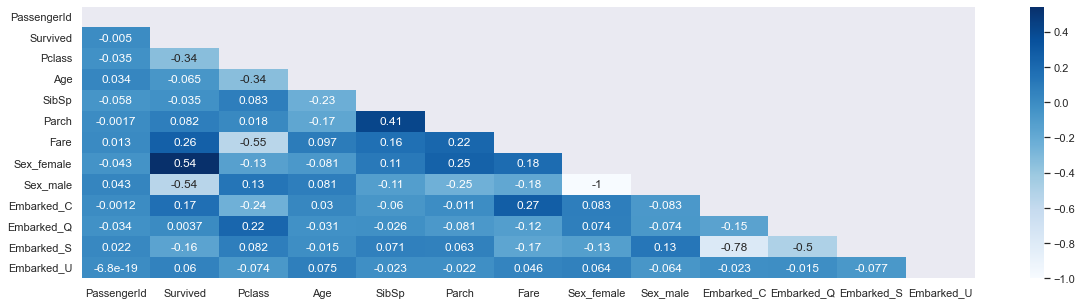

In [21]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, cmap="Blues", annot=True)

In [22]:
def category(factor):
    rows = []
    for item in data[factor].unique():
        row = {'Condition': factor}
        total = len(data[data[factor] == item])
        n = len(data[(data[factor] == item) & (data['Survived'] == 1)])
        prob = n / total
        row.update({'Level': item, 'Probability': prob})
        rows.append(row)
    return pd.DataFrame(rows)

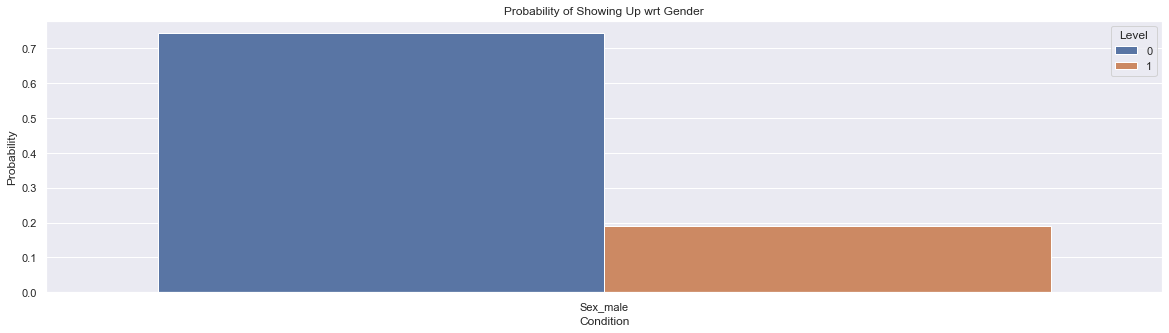

In [23]:
sns.barplot(data = category('Sex_male'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Gender')
plt.show()

Ici, 0 représente les passagers de sexe féminin et 1 ceux de sexe masculin.
Ce graphique montre que les femmes ont une probabilité de survie supérieure.

## Préparation du dataset en vue de l'application d'algorithme de machine learning

In [24]:
X = data.drop('Survived', axis=1)
y = data.Survived

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape )
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (596, 12)
Training Labels Shape: (596,)
Testing Features Shape: (295, 12)
Testing Labels Shape: (295,)


## Création d'un modèle de prédiction

##### Création d'un meilleur modèle de prédiction

In [26]:
parametres = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
              'n_estimators': list(range(100,500,100))}
model = GridSearchCV(RandomForestClassifier(), param_grid=parametres)
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

## Evaluation des résultats

In [27]:
y_pred = model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       175
           1       0.84      0.67      0.74       120

    accuracy                           0.81       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.82      0.81      0.81       295



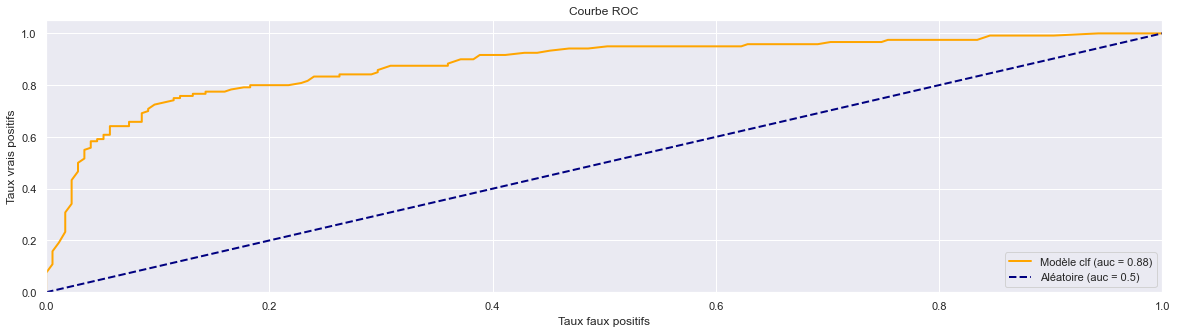

In [28]:
# AUROC
probs = model.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();